# Project 4: Concrete Strength Prediction
 
 

## Domain:
Manufacturing

 

## Context / Goal
To predict the concrete strength using the data available in file "concrete.csv". Apply feature engineering and model tuning to obtain a score above 85%.

 

## Attribute Information:

Given are the variable name, variable type, the measurement unit, and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database.

	Name	Data Type	Measurement	Description
1.	Cement (cement)	quantitative	kg in a m3 mixture	Input Variable
2.	Blast Furnace Slag (slag)	quantitative	kg in a m3 mixture	Input Variable
3.	Fly Ash (ash)	quantitative	kg in a m3 mixture	Input Variable
4.	Water(water)	quantitative	kg in a m3 mixture	Input Variable
5.	Superplasticizer (superplastic)	quantitative	kg in a m3 mixture	Input Variable
6.	Coarse Aggregate (coarseagg)	quantitative	kg in a m3 mixture	Input Variable
7.	Fine Aggregate (fineagg)	quantitative	kg in a m3 mixture	Input Variable
8.	Age(age)	quantitative	Day (1~365)	Input Variable
9.	Concrete compressive strength(strength)	quantitative	MPa	Output Variable

 

 
## Steps and tasks:

### Exploratory Data Quality Report Reflecting the Following:

#### Univariate analysis –data types and description of the independent attributes which should include (name, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions/tails, missing values, outliers, duplicates(10 Marks)

#### Bi-variate analysis between the predictor variables and between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms, or density curves. (10 marks)

#### Feature Engineering techniques(10 marks)
    1. identify opportunities (if any) to extract new features from existing features, drop a feature(if required) Hint: Feature Extraction, for example, consider a dataset with two features length and breadth. From this, we can extract a new feature Area which would be length * breadth.

    2. Get the data model ready and do a train test split.

    3. Decide on the complexity of the model, should it be a simple linear model in terms of parameters or would a quadratic or higher degree.
 

#### Creating the Model and Tuning It:

#### Algorithms that you think will be suitable for this project. Use Kfold Cross-Validation to evaluate model performance. Use appropriate metrics and make a DataFrame to compare models w.r.t their metrics. (at least 3 algorithms, one bagging and one boosting based algorithms have to be there). (15 marks)

#### Techniques employed to squeeze that extra performance out of the model without making it overfit. Use Grid Search or Random Search on any of the two models used above. Make a DataFrame to compare models after hyperparameter tuning and their metrics as above. (15 marks)

# Coding Starts Here

## Import Libraries and Load Dataset and do basic data checks

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Lets import everything we will need
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

#importing seaborn for statistical plots
import seaborn as sns

#To break the X and y dataframes into training set and test set we will need
#Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split
import numpy as np
from scipy import stats

# calculate accuracy measures and confusion matrix
from sklearn import metrics
import pandas_profiling
import graphviz
import pydotplus

#Importing all the Sklearn functions and yellowbrick functions.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from yellowbrick.classifier import ClassificationReport, ROCAUC
plt.style.use('ggplot')
pd.options.display.float_format = '{:,.2f}'.format
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint

In [3]:
#Lets load the Data csv file and look at the data
concrete_data = pd.read_csv('concrete.csv')
concrete_data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.30,212.00,0.00,203.50,0.00,971.80,748.50,28,29.89
1,168.90,42.20,124.30,158.30,10.80,"1,080.80",796.20,14,23.51
2,250.00,0.00,95.70,187.40,5.50,956.90,861.20,28,29.22
3,266.00,114.00,0.00,228.00,0.00,932.00,670.00,28,45.85
4,154.80,183.40,0.00,193.30,9.10,"1,047.40",696.70,28,18.29


In [4]:
#Lets  take a deeper look and draw some insights- info,shape, statistical summary, null check, incorrect imputation for concrete Data

concrete_data.info()
print('')
print ('shape:', concrete_data.shape)
print('')
print('size:', concrete_data.size)

print(' ')

# check if there are any missing values in concrete data via boolean
print("show the concrete data with boolean: \n", concrete_data.isnull())

# Count total NaN / missing values at each column for Concrete data
print(" \nCount total missing values at each column in a DataFrame : \n\n"), 
print( pd.DataFrame(concrete_data.isnull().sum(), columns = ['Number of missing values']))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB

shape: (1030, 9)

size: 9270
 
show the concrete data with boolean: 
       cement   slag    ash  water  superplastic  coarseagg  fineagg    age  \
0      False  False  False  False         False      False    False  False   
1      False  False  False  False         False      False    False  False   
2      False  False  False  False         False      False    Fal

In [5]:
#Analysing the distribution of the various continuous attributes like min, max, mean, count, 25th percentile, median, 75th percentile
concrete_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,"1,030.00",281.17,104.51,102.00,192.38,272.90,350.00,540.00
slag,"1,030.00",73.90,86.28,0.00,0.00,22.00,142.95,359.40
ash,"1,030.00",54.19,64.00,0.00,0.00,0.00,118.30,200.10
water,"1,030.00",181.57,21.35,121.80,164.90,185.00,192.00,247.00
superplastic,"1,030.00",6.20,5.97,0.00,0.00,6.40,10.20,32.20
coarseagg,"1,030.00",972.92,77.75,801.00,932.00,968.00,"1,029.40","1,145.00"
fineagg,"1,030.00",773.58,80.18,594.00,730.95,779.50,824.00,992.60
age,"1,030.00",45.66,63.17,1.00,7.00,28.00,56.00,365.00
strength,"1,030.00",35.82,16.71,2.33,23.71,34.45,46.14,82.60


Insights

- There seems to be no null values in the data set
- there seems to be be a lot of 0 values. this might seem conterintuitive but i do not think we need to impute for those 0 values as these can be just different kind of cement types and some have some of the properties and some do not. for example there is ash cement and cement that does not have ash
- slag, ash and age seem to have a major differnce between 50% and the mean values and this indicates skewness in the data- not sure if it will need to be resolved though
- if you look at the quartiles for slag and ash there seems to be some outliers. we will check some box plots. other columns do not look to have too many outliers

## EDA - Starting with Univariate analysis

In [6]:
#Lets quickly build a variable with the column names
concrete_col = ['cement', 'slag', 'ash', 'water', 'superplastic',
       'coarseagg', 'fineagg', 'age','strength']

In [7]:
#Lets check the skewness of the data
concrete_data.skew()

cement          0.51
slag            0.80
ash             0.54
water           0.07
superplastic    0.91
coarseagg      -0.04
fineagg        -0.25
age             3.27
strength        0.42
dtype: float64

It seems there is some right skewness in Slag and superplastic. the most skewness is in age. others seems to be OK.
Not sure if we will need to do some scaling. maybe we can try with and without scaling

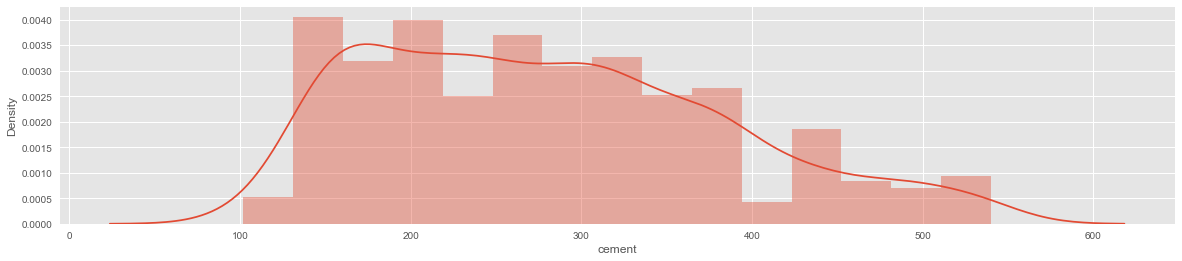

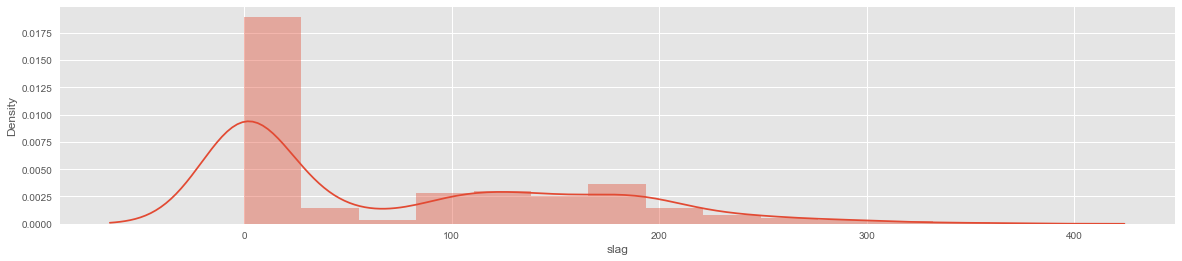

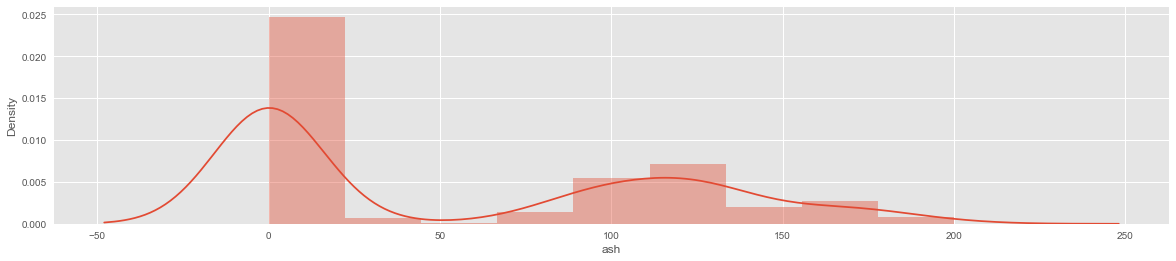

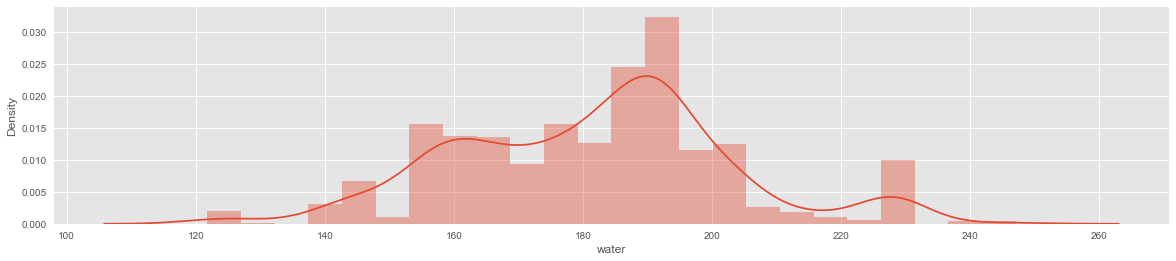

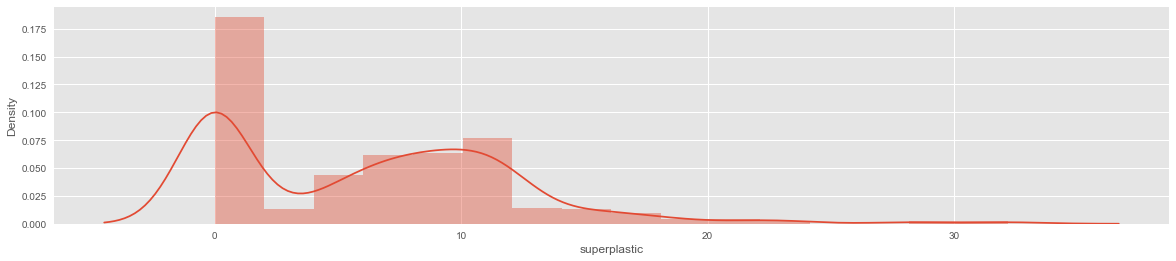

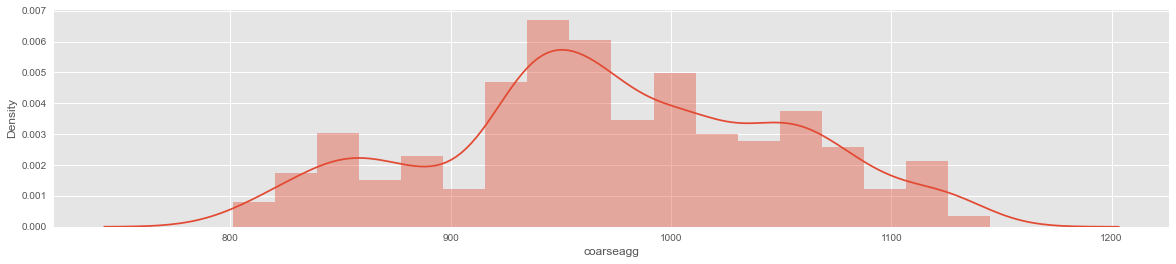

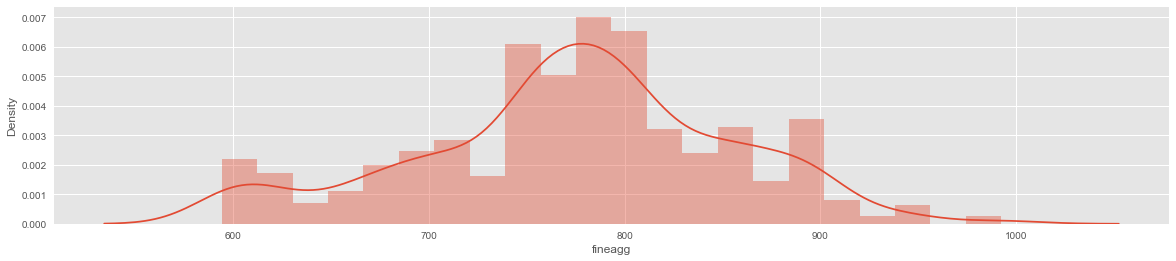

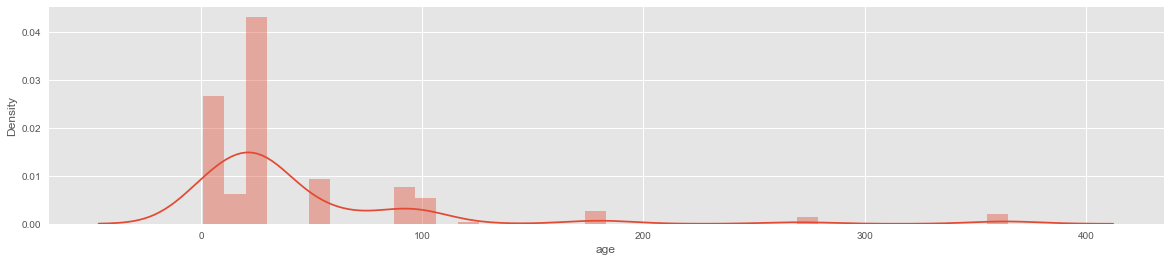

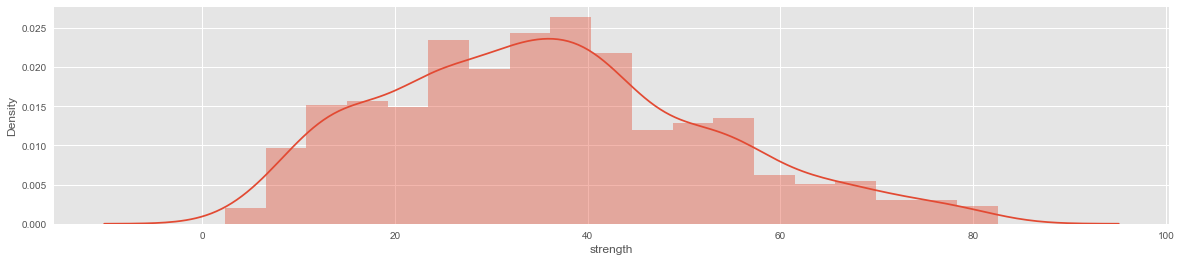

In [8]:
# distplot for continous columns
for i in concrete_col:
    plt.figure(figsize=(20,4))
    sns.distplot(concrete_data[i], kde = True)
    plt.show()

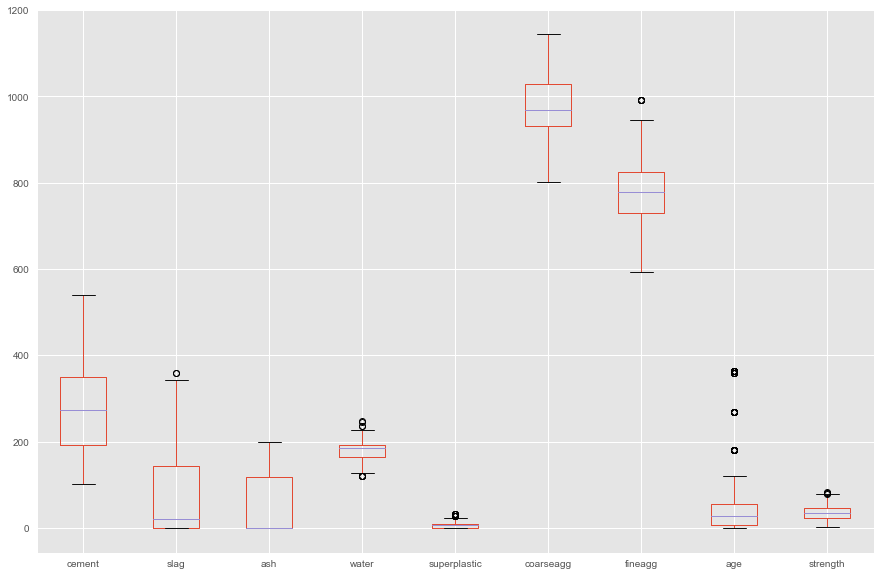

In [9]:
#Lets quickly do some box plots to check the quartiles and the outliers
plt.figure(figsize=(15,10))
concrete_data.boxplot()
plt.show()

Its clear that there are outliers in this case are mostly in water, superplastic and age.
we could attempt to clean some of these outliers

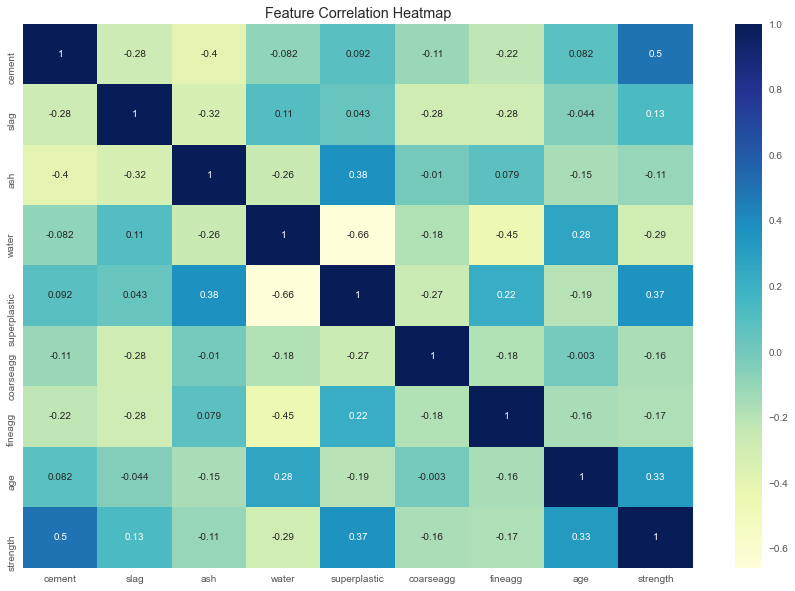

In [10]:
#Lets do a quick correlation heatmap
plt.figure(figsize=(15,10))
plt.title("Feature Correlation Heatmap")
sns.heatmap(concrete_data.corr(), annot = True, cmap="YlGnBu")

It does not seems there is much correlation between features

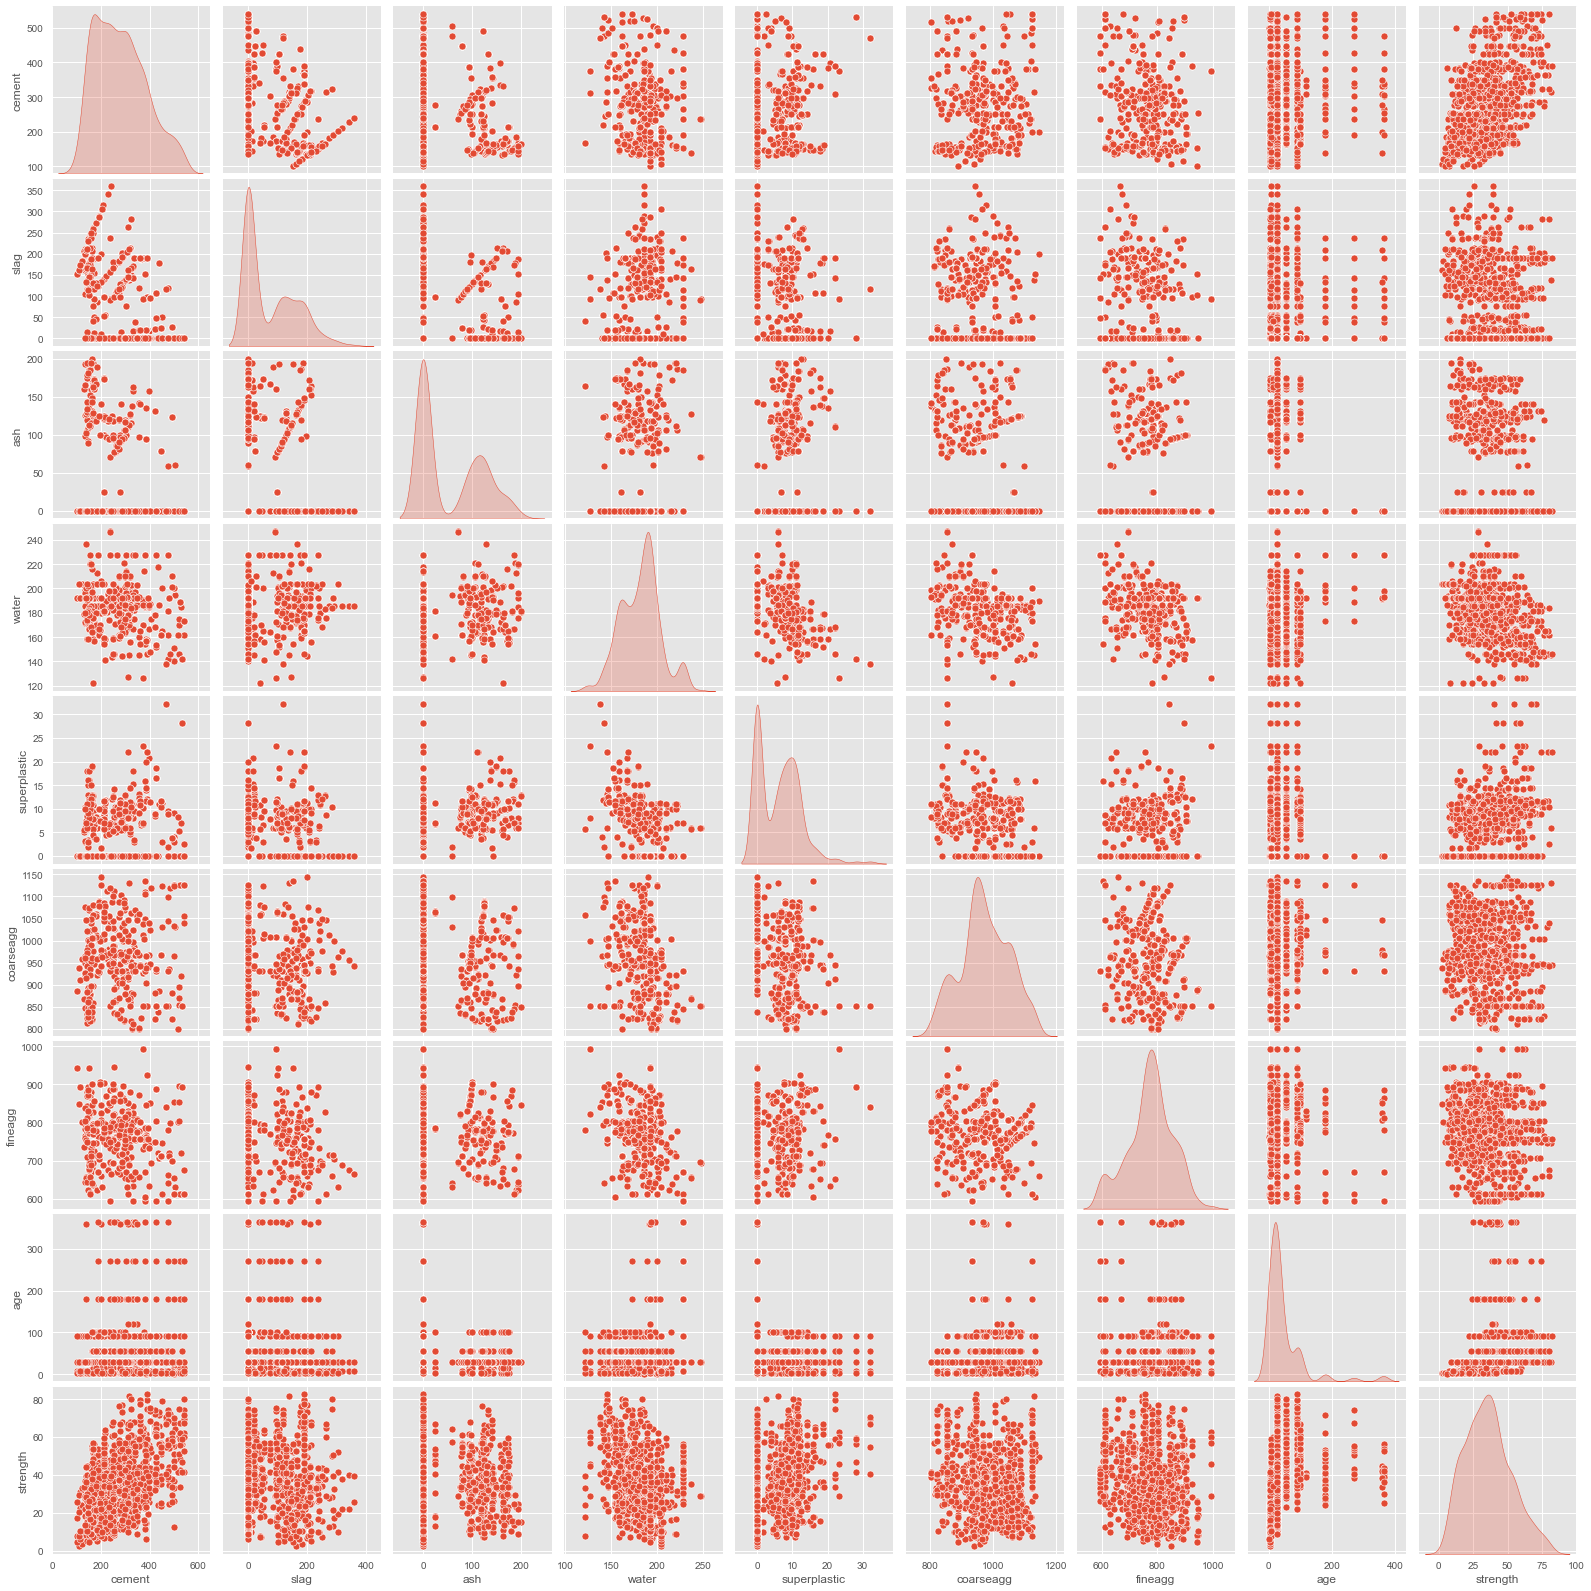

In [11]:
#Lets do some pairplots
sns.pairplot(concrete_data, diag_kind='kde')
plt.show()

## Bivariate Analysis

In [12]:
#Lets do some bivariate analysis, we can try grouping by age
concrete_data.groupby(["age"]).mean()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,strength
age,,,,,,,,
1,442.50,0.00,0.00,193.00,0.00,"1,045.50",688.00,9.46
3,286.58,65.98,57.16,176.19,6.62,977.25,796.11,18.98
7,312.92,92.94,12.64,183.29,3.75,983.81,768.10,26.05
14,246.18,18.59,97.85,173.39,6.68,"1,023.91",800.12,28.75
28,265.44,86.29,62.80,183.06,7.00,956.06,764.38,36.75
56,294.17,55.22,85.04,167.45,9.86,979.64,798.49,51.89
90,284.14,88.52,0.00,200.77,0.00,966.14,758.66,40.48
91,392.26,148.81,0.00,157.76,15.15,918.94,802.34,69.81
100,220.91,22.17,116.67,169.45,7.96,"1,025.30",809.45,47.67


its seems clear that the in the beginning ast the cement ages the strength increases. after a certain age the stength stays the same same or starts dropping. we can look at it more in ajoint plots

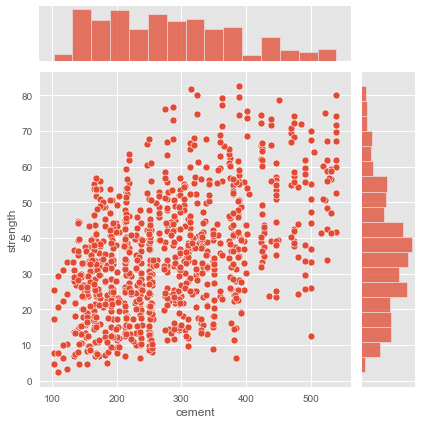

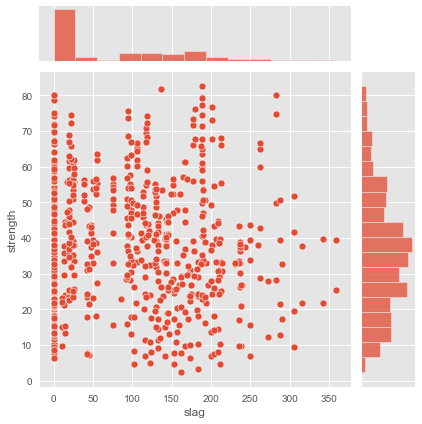

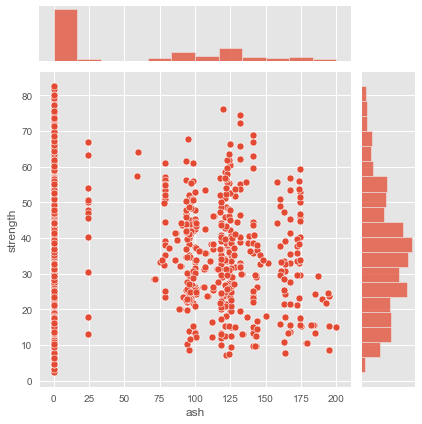

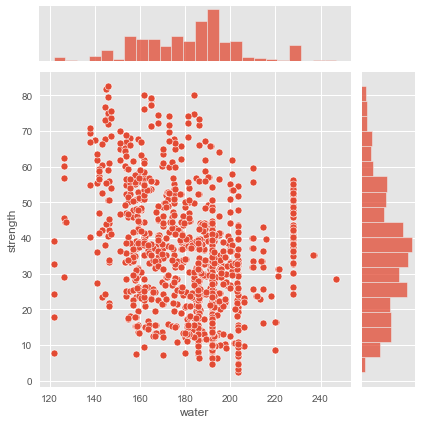

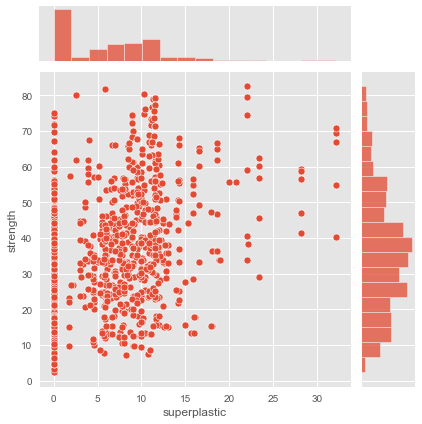

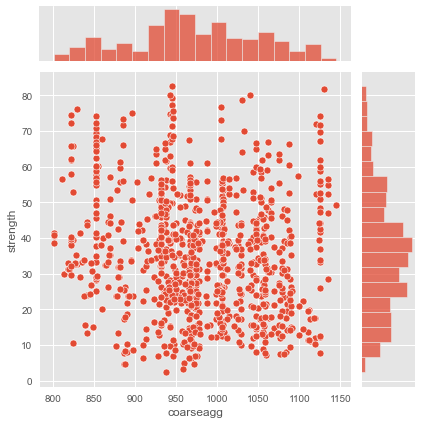

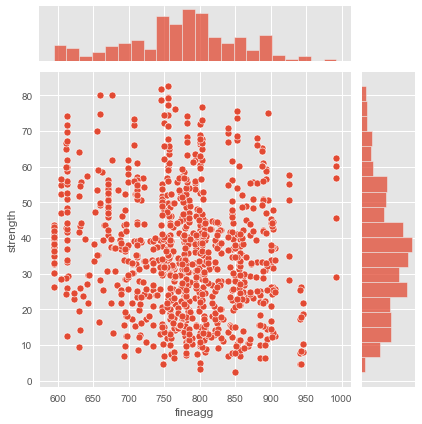

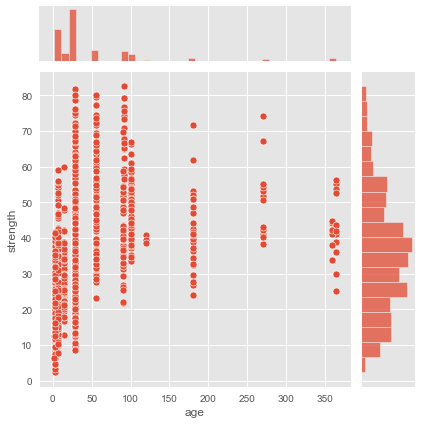

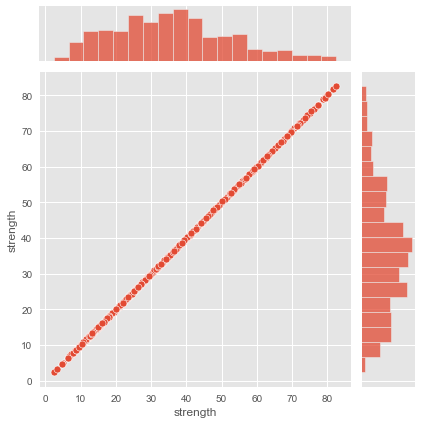

In [13]:
for i in concrete_col:
    sns.jointplot(concrete_data[i],concrete_data['strength'])

looking at the jointplots its not very clear how related age and stength are although it does seem on averag ethe strenght increases as age increases

## Prepare Datesets for Model building

In [14]:
#Lets quickly check the quartiles for strength and age
concrete_data['strength'].quantile([0.25,0.5,0.75])

0.25   23.71
0.50   34.45
0.75   46.14
Name: strength, dtype: float64

In [15]:
concrete_data['age'].quantile([0.25,0.5,0.75])

0.25    7.00
0.50   28.00
0.75   56.00
Name: age, dtype: float64

In [16]:
# Binning (Discretisation) of the feature: strength
#Although i am doing this, i will probably build a classification model for this and one regression model without these bins

bin_edges=[0,23, 34, 46, 100]
# first value is min value -1 of the column and last value is max +1  of the column, so that all values are included

bin_names=['1','2', '3','4']
# Names of each bin or category

concrete_data['strength_cat'] = pd.cut(concrete_data['strength'], bin_edges, labels=bin_names)

In [17]:
# Binning (Discretisation) of the feature: age
# I am doing this joping that binning the days into age will reduce the skewness. i will build one model to use this column and build another not using it

bin_edges=[0,30,60,90,120,150,180,210,240,270,300,330,365]

bin_names=['1','2', '3','4','5','6','7','8','9','10','11','12']
# Names of each bin or category

concrete_data['age_month'] = pd.cut(concrete_data['age'], bin_edges, labels=bin_names)

In [18]:
concrete_data.head(25)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,strength_cat,age_month
0,141.30,212.00,0.00,203.50,0.00,971.80,748.50,28,29.89,2,1
1,168.90,42.20,124.30,158.30,10.80,"1,080.80",796.20,14,23.51,2,1
2,250.00,0.00,95.70,187.40,5.50,956.90,861.20,28,29.22,2,1
3,266.00,114.00,0.00,228.00,0.00,932.00,670.00,28,45.85,3,1
4,154.80,183.40,0.00,193.30,9.10,"1,047.40",696.70,28,18.29,1,1
5,255.00,0.00,0.00,192.00,0.00,889.80,945.00,90,21.86,1,3
6,166.80,250.20,0.00,203.50,0.00,975.60,692.60,7,15.75,1,1
7,251.40,0.00,118.30,188.50,6.40,"1,028.40",757.70,56,36.64,3,2
8,296.00,0.00,0.00,192.00,0.00,"1,085.00",765.00,28,21.65,1,1
9,155.00,184.00,143.00,194.00,9.00,880.00,699.00,28,28.99,2,1


In [19]:
concrete_data['strength_cat'].value_counts()

2    267
3    261
4    258
1    244
Name: strength_cat, dtype: int64

In [20]:
concrete_data['age_month'].value_counts()

1     749
2      91
4      77
3      54
6      26
12     20
9      13
11      0
10      0
8       0
7       0
5       0
Name: age_month, dtype: int64

It seems that some of the months have no values. maybe we can do better binning

I will build two datasets- one to use for classification algorithms with strenght as categories and oanother dateset for linear regression with continuous strength.

i am doing this to see which returns better accuracy

In [21]:
#Continuos dependent variable dataset
conc_data1 = concrete_data.drop(["strength_cat", "age_month"], axis = 1)

In [22]:
conc_data1.head(5)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.30,212.00,0.00,203.50,0.00,971.80,748.50,28,29.89
1,168.90,42.20,124.30,158.30,10.80,"1,080.80",796.20,14,23.51
2,250.00,0.00,95.70,187.40,5.50,956.90,861.20,28,29.22
3,266.00,114.00,0.00,228.00,0.00,932.00,670.00,28,45.85
4,154.80,183.40,0.00,193.30,9.10,"1,047.40",696.70,28,18.29


In [23]:
#Lets try scaling on this data
scaler = StandardScaler()
conc_data1[:] = scaler.fit_transform(conc_data1[:])

In [24]:
conc_data1.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,-1.34,1.60,-0.85,1.03,-1.04,-0.01,-0.31,-0.28,-0.36
1,-1.07,-0.37,1.10,-1.09,0.77,1.39,0.28,-0.50,-0.74
2,-0.30,-0.86,0.65,0.27,-0.12,-0.21,1.09,-0.28,-0.40
3,-0.15,0.47,-0.85,2.18,-1.04,-0.53,-1.29,-0.28,0.60
4,-1.21,1.27,-0.85,0.55,0.48,0.96,-0.96,-0.28,-1.05


In [25]:
#Categorical dependent variable dataset
conc_data2 = concrete_data.drop(["strength", "age"], axis = 1)

In [26]:
conc_data2.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,strength_cat,age_month
0,141.30,212.00,0.00,203.50,0.00,971.80,748.50,2,1
1,168.90,42.20,124.30,158.30,10.80,"1,080.80",796.20,2,1
2,250.00,0.00,95.70,187.40,5.50,956.90,861.20,2,1
3,266.00,114.00,0.00,228.00,0.00,932.00,670.00,3,1
4,154.80,183.40,0.00,193.30,9.10,"1,047.40",696.70,1,1


In [27]:
conc_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   cement        1030 non-null   float64 
 1   slag          1030 non-null   float64 
 2   ash           1030 non-null   float64 
 3   water         1030 non-null   float64 
 4   superplastic  1030 non-null   float64 
 5   coarseagg     1030 non-null   float64 
 6   fineagg       1030 non-null   float64 
 7   strength_cat  1030 non-null   category
 8   age_month     1030 non-null   category
dtypes: category(2), float64(7)
memory usage: 59.1 KB


### First we will do regression models instead of classification models- Lets prepare the Test and training data splits

In [28]:
# Defining our X and Y variables so we can start building our logistic regression model.  we need to drop the dependent var
# from the X variable and put it in the Y varaible. also make sure it is a categorical variable 

X = conc_data1.drop('strength', axis=1)
Y = conc_data1['strength']

In [29]:
##Split into training and test set with 70:30 ratio with random state as 7
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=.3, random_state=7)
X_train.shape, X_test.shape

((721, 8), (309, 8))

In [30]:
#Lets prepare aeears that will be needed to build the results dataframe
algo= []
tr = []
te = []
cv = []


# Blanks list to store model name, training score, testing score, recall, precision and roc

### Linear Regresion

In [31]:
#lets run the model
linreg = LinearRegression()
# fit the model on train data
linregmod= linreg.fit(X_train, y_train) 

In [32]:
#Lets check the result
trainResult = linregmod.score(X_train, y_train)
testResult = linregmod.score(X_test, y_test)

In [33]:
#Lets print the results
print(trainResult)
print(testResult)

0.6108613237504796
0.6228785273568747


In [34]:
# We will do K-fold Cross validation on this with 10 splits
kfold = KFold(n_splits=10, random_state=77)
cvresults = cross_val_score(linregmod,X, Y, cv=kfold)
print(cvresults)
print(cvresults.mean())

[0.47614371 0.67567905 0.69840899 0.57072063 0.54738709 0.68539964
 0.59863602 0.61651603 0.50396964 0.54624389]
0.5919104690705976


In [35]:
#Lets append to the results dataframe
algo.append('Linear Regression')
tr.append(trainResult)
te.append(testResult)
cv.append(cvresults.mean())

### Polynomial Linear Regression

In [36]:
#since the linear regression did not return good results, lets try polynomial regression. I am going to try with degree 3.
poly = PolynomialFeatures( degree = 3, include_bias = True)
XPoly = poly.fit_transform(X)
XPoly_train = poly.fit_transform(X_train)
XPoly_test = poly.fit_transform(X_test)

In [37]:
#fit the model
regmodP2 = linreg.fit(XPoly_train, y_train)

In [38]:
#Lets check the result
trainResult = regmodP2.score(XPoly_train, y_train)
testResult = regmodP2.score(XPoly_test, y_test)

In [39]:
#Lets print the results
print(trainResult)
print(testResult)

0.9328470955748691
0.8572136194037232


Its clear that the polynomial regression is much better that linear regression

In [40]:
# We will do K-fold Cross validation on this with 10 splits
kfold = KFold(n_splits=10, random_state=77)
cvresults = cross_val_score(regmodP2,XPoly, Y, cv=kfold)
print(cvresults)
print(cvresults.mean())

[0.74585301 0.81729654 0.87780921 0.83729086 0.80195422 0.87879397
 0.90754981 0.8763295  0.87683754 0.88146121]
0.8501175865120063


In [41]:
algo.append('Polynomial Regression')
tr.append(trainResult)
te.append(testResult)
cv.append(cvresults.mean())

### Decision Tree Regressor

In [42]:
from sklearn.tree import DecisionTreeRegressor
#lets run the model
model_dtr = DecisionTreeRegressor(criterion='mse', random_state=22)

In [43]:
#Lets fit the model
model_dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=22)

In [44]:
#Lets check the result
trainResult = model_dtr.score(X_train, y_train)
testResult = model_dtr.score(X_test, y_test)

In [45]:
#Lets print the results
print(trainResult)
print(testResult)

0.9953725270651557
0.8445643852698367


In [46]:
# We will do K-fold Cross validation on this with 10 splits
kfold = KFold(n_splits=10, random_state=77)
cvresults = cross_val_score(model_dtr,X, Y, cv=kfold)
print(cvresults)
print(cvresults.mean())

[0.80956963 0.84286263 0.88004883 0.86967891 0.77738724 0.90635193
 0.90619863 0.87220269 0.86309029 0.88885435]
0.8616245128504595


In [47]:
#Lets append to the results dataframe
algo.append('Decision Tree Regressor')
tr.append(trainResult)
te.append(testResult)
cv.append(cvresults.mean())

### Gradient Boost Regressor

In [48]:
#lets run the gradient boost model
from sklearn.ensemble import GradientBoostingRegressor
gbrg = GradientBoostingRegressor(n_estimators=100, random_state=22)
gbrg = gbrg.fit(X_train, y_train)

In [49]:
#Lets check the result
trainResult = gbrg.score(X_train, y_train)
testResult = gbrg.score(X_test, y_test)

In [50]:
#print results
print(trainResult)
print(testResult)

0.950424130011718
0.9169584832043379


In [51]:
# We will do K-fold Cross validation on this with 10 splits
kfold = KFold(n_splits=10, random_state=77)
cvresults = cross_val_score(gbrg,X, Y, cv=kfold)
print(cvresults)
print(cvresults.mean())

[0.89176881 0.88724812 0.93724321 0.8880615  0.87236661 0.92390978
 0.92648049 0.92159343 0.90236373 0.90880979]
0.9059845463914467


In [52]:
#Lets append to the results dataframe
algo.append('Gradient Boost Regressor')
tr.append(trainResult)
te.append(testResult)
cv.append(cvresults.mean())

In [53]:
#Before we move on, as gradient boot is returning good accuracy lets try to do hyper parameter tuning using grid and random search algoritthms and see if we can improve the accuracy

#Lets do a grid search first

params = {
    'loss': ['ls', 'lad', 'huber'],
    'n_estimators': [100,150,200],
    'criterion': ['friedman_mse', 'mse', 'mae'],
    'min_samples_split': [1,2,3]
}

gbrg_gscv = GridSearchCV(GradientBoostingRegressor(), params, cv=3, verbose=2, n_jobs=4)
gbrg_gscv.fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    3.9s
[Parallel(n_jobs=4)]: Done 230 tasks      | elapsed:   40.5s
[Parallel(n_jobs=4)]: Done 243 out of 243 | elapsed:   49.9s finished


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=4,
             param_grid={'criterion': ['friedman_mse', 'mse', 'mae'],
                         'loss': ['ls', 'lad', 'huber'],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [100, 150, 200]},
             verbose=2)

In [54]:
#Lets check the best parameters
gbrg_gscv.best_params_

{'criterion': 'friedman_mse',
 'loss': 'ls',
 'min_samples_split': 2,
 'n_estimators': 200}

In [55]:
#lets prepare the model with best parameteres we found
gbrg_gs = GradientBoostingRegressor(n_estimators=200, criterion = 'friedman_mse', min_samples_split = 2, loss = 'ls')
gbrg_gs = gbrg_gs.fit(X_train, y_train)
#Lets check the result
trainResult = gbrg_gs.score(X_train, y_train)
testResult = gbrg_gs.score(X_test, y_test)
print(trainResult)
print(testResult)

0.9706613981148104
0.9359965982082656


In [56]:
# We will do K-fold Cross validation on this with 10 splits
kfold = KFold(n_splits=10, random_state=77)
cvresults = cross_val_score(gbrg_gs,X,Y, cv=kfold)
print(cvresults)
print(cvresults.mean())

[0.90267811 0.90362716 0.9500259  0.91138744 0.88882249 0.94057581
 0.93744094 0.94011192 0.92691533 0.92671283]
0.9228297936942452


In [57]:
#Lets append to the results dataframe
algo.append('Gradient Boost regressor GridsearchCV')
tr.append(trainResult)
te.append(testResult)
cv.append(cvresults.mean())

In [58]:
#now lets try with a random search
params = {
    'n_estimators': sp_randint(50, 200),
    'min_samples_split': sp_randint(0, 5),
    'loss': ['ls', 'lad', 'huber', 'quantile'],
    'criterion': ['friedman_mse', 'mse', 'mae'],
}


gbrg_rscv = RandomizedSearchCV(GradientBoostingRegressor(), params, cv=3, n_iter=5, n_jobs=4)
gbrg_rscv.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_iter=5,
                   n_jobs=4,
                   param_distributions={'criterion': ['friedman_mse', 'mse',
                                                      'mae'],
                                        'loss': ['ls', 'lad', 'huber',
                                                 'quantile'],
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000206676F49A0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000206676F44F0>})

In [59]:
#check the best paramters
gbrg_rscv.best_params_

{'criterion': 'mse',
 'loss': 'huber',
 'min_samples_split': 4,
 'n_estimators': 126}

In [60]:
#lets prepare the model with best parameteres we found
gbrg_rs = GradientBoostingRegressor(n_estimators=189, criterion = 'mae', min_samples_split = 3, loss = 'huber')
gbrg_rs = gbrg_rs.fit(X_train, y_train)
#Lets check the result
trainResult = gbrg_rs.score(X_train, y_train)
testResult = gbrg_rs.score(X_test, y_test)
print(trainResult)
print(testResult)

0.9499885217862878
0.9207744191582534


In [61]:
# We will do K-fold Cross validation on this with 10 splits
kfold = KFold(n_splits=10, random_state=77)
cvresults = cross_val_score(gbrg_rs,X,Y, cv=kfold)
print(cvresults)
print(cvresults.mean())

[0.90179112 0.89758325 0.94267372 0.89239247 0.87155526 0.92415773
 0.92855394 0.9326159  0.92621712 0.91193054]
0.9129471055313335


In [62]:
#Lets append to the results dataframe
algo.append('Gradient Boost regressor RandomsearchCV')
tr.append(trainResult)
te.append(testResult)
cv.append(cvresults.mean())

### Ada Boost Regressor

In [63]:
#lets run the model
from sklearn.ensemble import AdaBoostRegressor
abrg = AdaBoostRegressor(n_estimators=10, random_state=22)
abrg = abrg.fit(X_train, y_train)

In [64]:
#Lets check the result
trainResult = abrg.score(X_train, y_train)
testResult = abrg.score(X_test, y_test)

In [65]:
print(trainResult)
print(testResult)

0.7761926637053523
0.7286267105203977


In [66]:
# We will do K-fold Cross validation on this with 10 splits
kfold = KFold(n_splits=10, random_state=77)
cvresults = cross_val_score(abrg,X, Y, cv=kfold)
print(cvresults)
print(cvresults.mean())

[0.68828039 0.69950405 0.77537375 0.63710425 0.76021144 0.74865419
 0.71975095 0.71287545 0.71791469 0.78243557]
0.7242104730004669


In [67]:
#Lets append to the results dataframe
algo.append('Ada boot regressor')
tr.append(trainResult)
te.append(testResult)
cv.append(cvresults.mean())

### Bagging

In [68]:
from sklearn.ensemble import BaggingRegressor
bgrg = BaggingRegressor(n_estimators=100,random_state=22)
bgrg = bgrg.fit(X_train, y_train)

In [69]:
#Lets check the result
trainResult = bgrg.score(X_train, y_train)
testResult = bgrg.score(X_test, y_test)

In [70]:
print(trainResult)
print(testResult)

0.982292239737844
0.9181518235269582


In [71]:
# We will do K-fold Cross validation on this with 10 splits
kfold = KFold(n_splits=10, random_state=77)
cvresults = cross_val_score(bgrg,X, Y, cv=kfold)
print(cvresults)
print(cvresults.mean())

[0.87650637 0.89525784 0.95470282 0.91513202 0.88150437 0.93345648
 0.93675988 0.92344248 0.92273004 0.93242273]
0.9171915028728511


In [72]:
#Lets append to the results dataframe
algo.append('Bagging regressor')
tr.append(trainResult)
te.append(testResult)
cv.append(cvresults.mean())

In [73]:
#Lets do the same thing here and do some hyper paratmeter tuning
#start with grid search
params = {
    'n_estimators': [10,50,100,150,200],
    'max_features': [5,10,20,50,100]
}


bgrg_rscv = GridSearchCV(BaggingRegressor(), params, cv=3, verbose=2, n_jobs=4)
bgrg_rscv.fit(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  58 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done  68 out of  75 | elapsed:    2.1s remaining:    0.1s
[Parallel(n_jobs=4)]: Done  75 out of  75 | elapsed:    2.5s finished


GridSearchCV(cv=3, estimator=BaggingRegressor(), n_jobs=4,
             param_grid={'max_features': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 50, 100, 150, 200]},
             verbose=2)

In [74]:
bgrg_rscv.best_params_

{'max_features': 5, 'n_estimators': 50}

In [75]:
#lets prepare the model with best parameteres we found
bgrg = BaggingRegressor(n_estimators=150,max_features=5,random_state=22)
bgrg = bgrg.fit(X_train, y_train)
#Lets check the result
trainResult = bgrg.score(X_train, y_train)
testResult = bgrg.score(X_test, y_test)
print(trainResult)
print(testResult)

0.9205543027333436
0.8238855173809246


In [76]:
# We will do K-fold Cross validation on this with 10 splits
kfold = KFold(n_splits=10, random_state=77)
cvresults = cross_val_score(bgrg,X,Y, cv=kfold)
print(cvresults)
print(cvresults.mean())

[0.82502869 0.80884756 0.86363266 0.78494865 0.74984298 0.84151446
 0.80452871 0.85005169 0.82021435 0.83279186]
0.8181401605112569


In [77]:
#Lets append to the results dataframe
algo.append('Bagging regressor GridsearchCV')
tr.append(trainResult)
te.append(testResult)
cv.append(cvresults.mean())

In [78]:
#Lets do a random search hyperparameter tuning now
params = {
    'n_estimators': sp_randint(50, 200),
    'max_features': sp_randint(0, 15)
}


bgrg_rscv = RandomizedSearchCV(BaggingRegressor(), params, cv=3, n_iter=5, n_jobs=4)
bgrg_rscv.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=BaggingRegressor(), n_iter=5, n_jobs=4,
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000206679A4250>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000206676F4B80>})

In [79]:
##check the best paramters
bgrg_rscv.best_params_

{'max_features': 2, 'n_estimators': 155}

In [80]:
#lets prepare the model with best parameteres we found
bgrg = BaggingRegressor(n_estimators=113,max_features=8,random_state=22)
bgrg = bgrg.fit(X_train, y_train)
#Lets check the result
trainResult = bgrg.score(X_train, y_train)
testResult = bgrg.score(X_test, y_test)
print(trainResult)
print(testResult)

0.9825714410862694
0.9173671771542609


In [81]:
# We will do K-fold Cross validation on this with 10 splits
kfold = KFold(n_splits=10, random_state=77)
cvresults = cross_val_score(bgrg,X, Y, cv=kfold)
print(cvresults)
print(cvresults.mean())

[0.87806677 0.89436189 0.95551725 0.91661022 0.88054246 0.93361538
 0.9367458  0.92301548 0.92265392 0.93321259]
0.9174341761621807


In [82]:
#Lets append to the results dataframe
algo.append('Bagging regressor RandomsearchCV')
tr.append(trainResult)
te.append(testResult)
cv.append(cvresults.mean())

### Now lets try some Classification models on the second dataset

In [83]:
conc_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   cement        1030 non-null   float64 
 1   slag          1030 non-null   float64 
 2   ash           1030 non-null   float64 
 3   water         1030 non-null   float64 
 4   superplastic  1030 non-null   float64 
 5   coarseagg     1030 non-null   float64 
 6   fineagg       1030 non-null   float64 
 7   strength_cat  1030 non-null   category
 8   age_month     1030 non-null   category
dtypes: category(2), float64(7)
memory usage: 59.1 KB


In [84]:
# Defining our X and Y variables so we can start building our logistic regression model.  we need to drop the dependent var
# from the X variable and put it in the Y varaible. also make sure it is a categorical variable 

X = conc_data2.drop('strength_cat', axis=1)
Y = conc_data2['strength_cat'].astype('category')  

In [85]:
##Split into training and test set with 70:30 ratio with random state as 7
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=.3, random_state=7)
X_train.shape, X_test.shape

((721, 8), (309, 8))

### Logistic Regression

In [86]:
#lets run the model
logreg = LogisticRegression()
# fit the model on train data
logregmod= logreg.fit(X_train, y_train) 

In [87]:
#Lets check the result
trainResult = logregmod.score(X_train, y_train)
testResult = logregmod.score(X_test, y_test)

In [88]:
print(trainResult)
print(testResult)

0.5131761442441054
0.44983818770226536


In [89]:
# We will do K-fold Cross validation on this with 10 splits
kfold = KFold(n_splits=10, random_state=77)
cvresults = cross_val_score(model_dtr,X, Y, cv=kfold)
print(cvresults)
print(cvresults.mean())

[0.38191935 0.71902909 0.44694426 0.50224561 0.48697664 0.54331602
 0.4784656  0.43098798 0.50959179 0.47337427]
0.49728506022329794


In [90]:
#Lets append to the results dataframe
algo.append('Logistic Regression Classifier')
tr.append(trainResult)
te.append(testResult)
cv.append(cvresults.mean())

Its pretty clear that linear regression model is not accurate at all

### Random Forest (Bagging)

In [91]:
#lets run the model
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(n_estimators=100,random_state=22)
bgcl = bgcl.fit(X_train, y_train)

In [92]:
#Lets check the result
trainResult = bgcl.score(X_train, y_train)
testResult = bgcl.score(X_test, y_test)

In [93]:
print(trainResult)
print(testResult)

0.8377253814147018
0.6084142394822006


In [94]:
# We will do K-fold Cross validation on this with 10 splits
kfold = KFold(n_splits=10, random_state=77)
cvresults = cross_val_score(bgcl,X, Y, cv=kfold)
print(cvresults)
print(cvresults.mean())

[0.60194175 0.70873786 0.66990291 0.62135922 0.60194175 0.63106796
 0.51456311 0.53398058 0.62135922 0.60194175]
0.6106796116504853


In [95]:
#Lets append to the results dataframe
algo.append('Random Forest Classifier')
tr.append(trainResult)
te.append(testResult)
cv.append(cvresults.mean())

In [96]:
#lets see if we can improve teh accuracy by hyperparameter tuning

In [97]:
#start with grid search
params = {
    'n_estimators': [10,50,100,150,200],
    'max_features': [5,10,20,50,100]
}

bgcl_rscv = GridSearchCV(BaggingClassifier(), params, cv=3, verbose=2, n_jobs=4)
bgcl_rscv.fit(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  58 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done  68 out of  75 | elapsed:    2.2s remaining:    0.1s
[Parallel(n_jobs=4)]: Done  75 out of  75 | elapsed:    2.6s finished


GridSearchCV(cv=3, estimator=BaggingClassifier(), n_jobs=4,
             param_grid={'max_features': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 50, 100, 150, 200]},
             verbose=2)

In [98]:
bgcl_rscv.best_params_

{'max_features': 5, 'n_estimators': 100}

In [99]:
#lets prepare the model with best parameteres we found
bgcl = BaggingClassifier(n_estimators=200,max_features=5,random_state=22)
bgcl = bgcl.fit(X_train, y_train)
#Lets check the result
trainResult = bgcl.score(X_train, y_train)
testResult = bgcl.score(X_test, y_test)
print(trainResult)
print(testResult)

0.8363384188626907
0.598705501618123


In [100]:
# We will do K-fold Cross validation on this with 10 splits
kfold = KFold(n_splits=10, random_state=77)
cvresults = cross_val_score(bgcl,X,Y, cv=kfold)
print(cvresults)
print(cvresults.mean())

[0.61165049 0.67961165 0.66019417 0.58252427 0.62135922 0.61165049
 0.47572816 0.5631068  0.61165049 0.55339806]
0.5970873786407768


In [101]:
#Lets append to the results dataframe
algo.append('Random Forest Classifier GridsearchCV')
tr.append(trainResult)
te.append(testResult)
cv.append(cvresults.mean())

That did not improve much. Maybe we can try random search

In [102]:
#start with grid search
params = {
    'n_estimators': sp_randint(50, 200),
    'max_features': sp_randint(0, 15)
}

bgcl_rscv = RandomizedSearchCV(BaggingClassifier(), params, cv=3, verbose=2, n_jobs=4)
bgcl_rscv.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  23 out of  30 | elapsed:    2.1s remaining:    0.6s
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    2.6s finished


RandomizedSearchCV(cv=3, estimator=BaggingClassifier(), n_jobs=4,
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000206679BFE80>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000206679AFF10>},
                   verbose=2)

In [103]:
bgcl_rscv.best_params_

{'max_features': 7, 'n_estimators': 163}

In [104]:
#lets prepare the model with best parameteres we found
bgcl = BaggingClassifier(n_estimators=115,max_features=7,random_state=22)
bgcl = bgcl.fit(X_train, y_train)
#Lets check the result
trainResult = bgcl.score(X_train, y_train)
testResult = bgcl.score(X_test, y_test)
print(trainResult)
print(testResult)

0.8377253814147018
0.6181229773462783


Wohoo...we were able to imprve the accuracy by a little bit :-)

In [105]:
# We will do K-fold Cross validation on this with 10 splits
kfold = KFold(n_splits=10, random_state=77)
cvresults = cross_val_score(bgcl,X,Y, cv=kfold)
print(cvresults)
print(cvresults.mean())

[0.60194175 0.70873786 0.66019417 0.61165049 0.62135922 0.6407767
 0.52427184 0.57281553 0.62135922 0.61165049]
0.6174757281553397


In [106]:
#Lets append to the results dataframe
algo.append('Random Forest Classifier RandomsearchCV')
tr.append(trainResult)
te.append(testResult)
cv.append(cvresults.mean())

### Ada boost

In [107]:
#lets run the model
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=22)
abcl = abcl.fit(X_train, y_train)

In [108]:
#Lets check the result
trainResult = abcl.score(X_train, y_train)
testResult = abcl.score(X_test, y_test)

In [109]:
print(trainResult)
print(testResult)

0.5755894590846047
0.5631067961165048


In [110]:
# We will do K-fold Cross validation on this with 10 splits
kfold = KFold(n_splits=10, random_state=77)
cvresults = cross_val_score(abcl,X, Y, cv=kfold)
print(cvresults)
print(cvresults.mean())

[0.52427184 0.5631068  0.6407767  0.48543689 0.5631068  0.5631068
 0.55339806 0.52427184 0.5631068  0.44660194]
0.5427184466019417


In [111]:
#Lets append to the results dataframe
algo.append('Adaboost Classifier')
tr.append(trainResult)
te.append(testResult)
cv.append(cvresults.mean())

### Lets check the results

In [112]:
# DataFrame to compare results.

results = pd.DataFrame()
results['Model'] = algo
results['Training Score'] = tr
results['Testing Score'] = te
results['Kfold CV Score'] = cv
results = results.set_index('Model')
results

,Training Score,Testing Score,Kfold CV Score
Model,,,
Linear Regression,0.61,0.62,0.59
Polynomial Regression,0.93,0.86,0.85
Decision Tree Regressor,1.00,0.84,0.86
Gradient Boost Regressor,0.95,0.92,0.91
Gradient Boost regressor GridsearchCV,0.97,0.94,0.92
Gradient Boost regressor RandomsearchCV,0.95,0.92,0.91
Ada boot regressor,0.78,0.73,0.72
Bagging regressor,0.98,0.92,0.92
Bagging regressor GridsearchCV,0.92,0.82,0.82


As you can clearly see tha the best results were from the regression models like Gradient Boost regressor, bagging regressor etc. I tried some classifier models as well with the second dataset with a dependent variable as a categorr. however those models/algorithms did not return good accuracy results with the predictions.

I was able to further validate the results by running the Kfold cross validations. I noticed that the results did nit deviate too much.

Finally, I was able to improve some of the models very slightly by performing hyperparameter tuning using the grid and random search methodologies. 

The best algoriths turned out to be Gradient Boost regressor and Bagging Regressor